# Read pattern data

In [44]:
import pandas as pd
import math

df_original_songs = pd.read_json('dfs/df_original_songs.json')
df_PAF_patterns = pd.read_json('dfs/df_PAF_patterns_durations.json')
df_ANOMIC_patterns = pd.read_json('dfs/df_ANOMIC_patterns_durations.json')
df_algorithm_patterns = pd.read_json('dfs/df_algorithm_patterns.json')


In [46]:
print(len(df_PAF_patterns.user_id.unique()))
print(len(df_ANOMIC_patterns.user_id.unique()))
print(len(df_algorithm_patterns.user_id.unique()))

13
26
6


In [50]:
df_PAF_patterns

,user_id,song_id,pattern_id,occurrence_id,note_times,note_numbers,note_durations
0,11,0,1,1,"[1.0, 1.5, 2.0, 2.5]","[67.0, 60.0, 65.0, 53.0]","[0.5, 0.5, 0.5, 0.5]"
1,11,0,2,1,"[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]","[67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57.0, 60.0]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]"
2,11,1,1,1,"[1.0, 2.0, 3.0, 4.0]","[70.0, 69.0, 67.0, 74.0]","[1.0, 1.0, 1.0, 1.0]"
3,11,1,2,1,"[5.0, 5.5, 6.0]","[74.0, 72.0, 70.0]","[0.5, 0.5, 1.0]"
4,13,0,1,1,"[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]","[67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57.0, 60.0]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]"
...,...,...,...,...,...,...,...
362,31,5,1,1,"[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.5, 5.0, ...","[77.0, 74.0, 74.0, 74.0, 70.0, 70.0, 70.0, 74....","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, ..."
363,31,5,2,1,"[6.5, 7.25, 7.5, 8.0, 8.5, 9.0, 9.5, 10.5, 11....","[75.0, 74.0, 72.0, 67.0, 70.0, 69.0, 70.0, 74....","[0.75, 0.25, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0..."
364,31,5,3,1,"[12.5, 12.75, 13.0, 13.5, 14.0, 14.25, 14.5, 1...","[77.0, 79.0, 77.0, 74.0, 74.0, 75.0, 74.0, 70....","[0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 0.5, 0.5, 1..."
365,31,5,4,1,"[18.5, 19.25, 19.5, 20.0, 20.5, 21.0, 21.5, 22...","[75.0, 74.0, 72.0, 67.0, 70.0, 69.0, 70.0, 74....","[0.75, 0.25, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0..."


In [51]:
df_ANOMIC_patterns

,user_id,song_id,pattern_id,occurrence_id,note_times,note_numbers,note_durations
0,0,0,0,0,"[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[65.0, 67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57....","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
1,0,0,0,1,"[24.0, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28....","[65.0, 67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57....","[1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
2,0,1,0,0,"[8.0, 9.0, 10.0, 11.0]","[72.0, 70.0, 69.0, 67.0]","[1.0, 1.0, 1.0, 1.0]"
3,0,1,0,1,"[12.0, 13.0, 14.0, 15.0]","[72.0, 70.0, 69.0, 67.0]","[1.0, 1.0, 1.0, 1.0]"
4,0,1,0,2,"[24.0, 25.0, 26.0, 27.0]","[72.0, 70.0, 69.0, 67.0]","[1.0, 1.0, 1.0, 1.0]"
...,...,...,...,...,...,...,...
2751,25,5,18,2,"[20.5, 21.0]","[70.0, 69.0]","[0.5, 0.5]"
2752,25,5,18,3,"[110.5, 111.0]","[70.0, 69.0]","[0.5, 0.5]"
2753,25,5,18,4,"[114.5, 115.0]","[70.0, 69.0]","[0.5, 0.5]"
2754,25,5,18,5,"[116.5, 117.0]","[70.0, 69.0]","[0.5, 0.5]"


# Analyse ANOMIC users

In [48]:
import json
import os 
from os import listdir
from os.path import isfile, join
import pandas as pd 


def check_if_musician(row):
    if row['musical_background_score'] >= mus_threshold: #TODO
        val = True
    else:
        val = False
    return val


# 5 or above == "musical background"
import numpy as np
def analyse_HEMAN2_users(df):
    num_users = df['user_id'].nunique()
    file = "dfs/anomic_user_background.txt"
    df_user_data = pd.DataFrame(columns=['user_id', 'musical_background_score'])
    
    with open(file) as f:
        for i, line in enumerate(f):
            #print(i)
            df_user_data = df_user_data.append({'user_id': i,
                                                'musical_background_score': int(line)
                                               }, ignore_index=True)
    return df_user_data


def find_matches_stephan(patterns,user_id,other_user, song_id, threshold, rank):
    count_matches = 0
    #print("Find matches for: user:", user_id, 'other:', other_user, ' song:', song_id)
    if ( rank == 0):
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id)]
    else:
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id) & (patterns.pattern_rank == rank)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id) & (patterns.pattern_rank==rank)]
    
    # iterate over patterns of specific user of specific song and compare to all others
    for index, row in pat_main.iterrows():
        s_time = row.ms_start_time
        e_time = row.ms_end_time
        
        for ind_y, row_other in pat_others.iterrows():
            o_s_time = row_other.ms_start_time
            o_e_time = row_other.ms_end_time
            
            # |begin1- begin2| + |end1 - end2| ≤ Threshold
            abs_value =  abs(s_time - o_s_time) + abs(e_time - o_e_time)
            #print("Computed: ", abs_value)
            if( abs_value <= threshold):
                count_matches = count_matches + 1
                break
        #print(s_time, ' ', e_time)
    #print(pat_others)
    #print("Result", count_matches)
    return count_matches


def find_matches_adaptive_threshold(patterns,user_id,other_user, song_id, threshold_ratio, rank):
    count_matches = 0
    #print("Find matches for: user:", user_id, 'other:', other_user, ' song:', song_id)
    if ( rank == 0):
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id)]
    else:
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id) & (patterns.pattern_rank == rank)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id) & (patterns.pattern_rank==rank)]
    
    # iterate over patterns of specific user of specific song and compare to all others
    for index, row in pat_main.iterrows():
        s_time = row.start_time
        e_time = row.end_time
        
        main_duration = e_time - s_time
        threshold = main_duration * threshold_ratio
        
        #print("Threshold:", threshold)
        for ind_y, row_other in pat_others.iterrows():
            o_s_time = row_other.start_time
            o_e_time = row_other.end_time
            
            other_duration = o_e_time - o_s_time
            #threshold = (main_duration + other_duration)/2 * threshold_ratio
            
            # |begin1- begin2| + |end1 - end2| ≤ Threshold
            abs_value =  abs(s_time - o_s_time) + abs(e_time - o_e_time)
            #print("Computed: ", abs_value)
            if( abs_value <= threshold):
                count_matches = count_matches + 1
                break

    #print("Result", count_matches)
    return count_matches



# sanity check (if duration is less than 0)
def sanity_check():
    all_durations = []
    for index, row in df_stephan.iterrows():
        tmp_duration = row['end_time'] - row['start_time']
        all_durations.append(tmp_duration)

        if(tmp_duration < 0):
            print(row['start_time'], row['end_time'])
            break
            
#####################################################

In [52]:

def compute_time(time_dict, count_mode):
    sum_time = 0
    for key in time_dict:        
        ratio = count_mode / int(key)
        sum_time = sum_time + (time_dict[key] * ratio)

    return sum_time


def analyse_pattern_times():
    import json
    import xml.etree.ElementTree as ET
    import sys
    import os
    from xml.dom import minidom
    import pandas as pd
    
    # default tempo used
    tempo = 120
    ms_per_crotchet = 96 # 480 #TODO # 500 #1/(tempo / 60) * 1000
    #ms_per_crotchet = 750
    
    print(ms_per_crotchet)
    folder_path = 'xml_patterns/'
    file_list = os.listdir(folder_path)

    count_mode = 4
    
    df_pat_times = pd.DataFrame(columns=['pattern_id', 'crotchet_start_time', 'crotchet_end_time', 
                                         'last_note_duration', 'ms_start_time', 'ms_end_time'])

    for file in file_list:
        pattern_id = int(file.split(".")[0].split("_")[1])
        file_path = folder_path + file
        pattern_xml = minidom.parse(file_path)

        last_note_dur = -1
        tone_range = 0
        
        time_sig_node = pattern_xml.getElementsByTagName('staffDef')[0]
        time_signature_up = time_sig_node.getAttribute('meter.count')
        time_signature_down = time_sig_node.getAttribute('meter.unit')
        

        notes = pattern_xml.getElementsByTagName('note')
        measures = pattern_xml.getElementsByTagName('measure')

        start_measure = measures[0]
        end_measure = measures[measures.length-1]
        start_children = start_measure.childNodes[1].childNodes[1].childNodes

        # go over starting children, if rest do not increase time, when notes start the loop ends
        start_dict = {"32": 0, "16": 0 , "8": 0, "4": 0, "2": 0, "1": 0}
        
        for node in start_children:
            # get only non empty nodes
            if(node.nodeValue == None):
                if(node.tagName != "rest"):
                    break
                # increment the correct dict element by 1
                tmp_dur = node.getAttribute('dur')
                start_dict[tmp_dur] = start_dict[tmp_dur] + 1

        start_time = compute_time(start_dict, count_mode)

        # TODO TODO TODO
        start_measure_n = int(start_measure.getAttribute('n')) - 1#start_measure.getAttribute('n')
        end_measure_n = int(end_measure.getAttribute('n')) - 1 #end_measure.getAttribute('n')


        #                # measure     # staff       # layer       # notes
        end_children = end_measure.childNodes[1].childNodes[1].childNodes
        end_dict = {"32": 0, "16": 0 , "8": 0, "4": 0, "2": 0, "1": 0}
        count_or_not = False
        for node in end_children:
            # get only non empty nodes
            if(node.nodeValue == None):
                # pass first notes, till rests are found, otherwise time is 0
                if(node.tagName != "rest"):
                    count_or_not = True
                    continue
                if(count_or_not == True):
                    tmp_dur = node.getAttribute('dur')
                    end_dict[tmp_dur] = end_dict[tmp_dur] + 1
        end_time = count_mode * int(time_signature_up) / int(time_signature_down) - compute_time(end_dict, count_mode)

        # ADD MEASURE TIMES TO START AND END
        start_time_measure = int(start_measure_n) * count_mode * int(time_signature_up) / int(time_signature_down) 
        start_time = start_time + start_time_measure

        end_time_measure = int(end_measure_n) * count_mode * int(time_signature_up) / int(time_signature_down) 
        end_time = end_time + end_time_measure


        # get duration of last note
        for node in end_children:
            # get only non empty nodes
            if(node.nodeValue == None):
                # pass first notes, till rests are found, otherwise time is 0
                if(node.tagName == "rest"):
                    break
                tmp_dur = node.getAttribute('dur')
                last_note_dur = tmp_dur
                
        if(last_note_dur == -1):
            # get duration of last note
            note_already = False
            for node in start_children:
                # get only non empty nodes
                if(node.nodeValue == None):
                    # pass first notes, till rests are found, otherwise time is 0
                    if(node.tagName != "rest"):
                        tmp_dur = node.getAttribute('dur')
                        last_note_dur = tmp_dur
        
        
        crotchet_start_time = start_time
        crotchet_end_time = end_time 
        
        ms_start_time = crotchet_start_time * ms_per_crotchet
        ms_end_time = crotchet_end_time * ms_per_crotchet
        
        
        # ADD TO DATAFRAME
        df_pat_times.loc[pattern_id-1] = [int(pattern_id)] + [start_time] + [end_time] + [last_note_dur] + [ms_start_time] + [ms_end_time] 

    return df_pat_times

def clean_data(user_data):
    import json
    import xml.etree.ElementTree as ET
    import sys
    import os
    import pandas as pd 

    user_data = user_data[~user_data.id.isin([2,5,6,7,9])]

    #cleaning the data
    user_data.loc[user_data.user_instrument == 'Piano', 'user_instrument'] = 'piano'
    user_data.loc[user_data.user_instrument == 'Guitar', 'user_instrument'] = 'guitar'
    user_data.loc[user_data.user_instrument == 'Singer', 'user_instrument'] = 'voice'
    user_data.loc[user_data.user_instrument == 'singing', 'user_instrument'] = 'voice'
    user_data.loc[user_data.user_instrument == 'Vokal', 'user_instrument'] = 'voice'
    user_data.loc[user_data.user_instrument == 'saksofon', 'user_instrument'] = 'saxophone'
    user_data.loc[user_data.user_instrument == 'composer', 'user_instrument'] = 'composition'
    user_data.loc[user_data.user_instrument == 'Composition', 'user_instrument'] = 'composition'

    user_data['university_programme'] = 'empty'
    user_data.loc[user_data.id == 10, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 11, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 12, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 13, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 14, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 17, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 19, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 20, 'university_programme'] = 'UL FF Musicology'
    user_data.loc[user_data.id == 22, 'university_programme'] = 'UL FF Musicology'

    user_data.loc[user_data.id == 15, 'university_programme'] = 'KGBL'

    user_data.loc[user_data.id == 16, 'university_programme'] = 'UM PEF Music Pedagogy'
    user_data.loc[user_data.id >= 24, 'university_programme'] = 'UM PEF Music Pedagogy'

    user_data.loc[user_data.id == 18, 'university_programme'] = 'UL AG theory/composition'
    user_data.loc[user_data.id == 21, 'university_programme'] = 'UL AG theory/composition'
    user_data.loc[user_data.id == 22, 'university_programme'] = 'UL AG theory/composition'
    user_data.loc[user_data.id == 23, 'university_programme'] = 'UL AG theory/composition'
    
    return user_data



## OUR ANALYSIS
def analyse_user_data():
    import json
    import xml.etree.ElementTree as ET
    import sys
    import os
    import pandas as pd 

    pattern_file = "data_02_06_2019.json"
    user_file = "data_users_19_06_2019.json"

    user_data = pd.read_json(user_file)
    user_data = clean_data(user_data)
    pattern_data = pd.read_json(pattern_file)
    
    #pattern_notes_measures = count_notes_and_measures()
    pattern_times = analyse_pattern_times()
    #pattern_ranges = analyse_pattern_notes()
    #print(user_data)
    #print(pattern_data)

    user_data = user_data.rename({'id': 'user_id'}, axis='columns')

    df_data = user_data.merge(pattern_data, how = 'inner', on = ['user_id'])
    #df_data = df_data.merge(pattern_notes_measures, how = 'inner', on = ['pattern_id'])
    #df_data = df_data.merge(pattern_ranges, how = 'inner', on = ['pattern_id'])
    df_data = df_data.merge(pattern_times, how = 'inner', on = ['pattern_id']) 


    df_data = df_data.drop(columns=['xml_file', 'user_email', 'user_name', 'user_password'])
    
    #print(df_data)
    #print( list(df_data))
    df_data.to_json('dataframe_data.json', orient='records')
    
    
    return df_data
    #df_data.to_json('dataframe_data.json', orient='records')

def find_matches(patterns, user_id, other_user, song_id, threshold, rank):
    count_matches = 0
    #print("Find matches for: user:", user_id, 'other:', other_user, ' song:', song_id)
    if ( rank == 0):
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id)]
    else:
        pat_main = patterns[(patterns.user_id == user_id) & (patterns.song_id == song_id) & (patterns.pattern_rank == rank)]
        pat_others = patterns[(patterns.user_id == other_user) & (patterns.song_id == song_id) & (patterns.pattern_rank==rank)]
    
    # iterate over patterns of specific user of specific song and compare to all others
    for index, row in pat_main.iterrows():
        # TODO change here 
        s_time = row.note_times[0]
        e_time = row.note_times[-1]
        #s_time = row.ms_start_time
        #e_time = row.ms_start_time
        
        for ind_y, row_other in pat_others.iterrows():
            o_s_time = row_other.note_times[0]
            o_e_time = row_other.note_times[-1]
            
            # |begin1- begin2| + |end1 - end2| ≤ Threshold
            abs_value =  abs(s_time - o_s_time) + abs(e_time - o_e_time)
            #print("Computed: ", abs_value)
            if( abs_value <= threshold):
                count_matches = count_matches + 1
                break
        #print(s_time, ' ', e_time)
    #print(pat_others)
    #print("Result", count_matches)
    return count_matches


# get both df
def get_both(df_PAF, df_HEMAN2, ppq_else_crotchet=True, all_musicians_notmusicians=0, both_HEMAN2_PAF=0, was_it_new_heman2 = True):
    
    # combine matrices
    # rename things that would otherwise clash with ANOMIC
    # turn user ids negative, so that we can distinguish
    df_PAF = df_PAF[['user_id','song_id', 'pattern_id', 'ms_start_time','ms_end_time', 'crotchet_start_time','crotchet_end_time', 'prog_id']]
    df_PAF = df_PAF.rename(columns={"pattern_id": "PAF_pattern_id"})
    
    # default
    df_PAF['start_time'] = df_PAF['ms_start_time']
    df_PAF['end_time'] = df_PAF['ms_end_time'] 
    
    if (ppq_else_crotchet == False):
        df_PAF['start_time'] = df_PAF['crotchet_start_time']
        df_PAF['end_time'] = df_PAF['crotchet_end_time'] 

    df_PAF['user_id'] *= -1 
    
    
    # HEMAN2 part
    df_HEMAN2_part = df_HEMAN2[['user_id', 'song_id', 'pattern_id', 'occurrence_id', 'start_time', 'end_time']]
    df_HEMAN2_part = df_HEMAN2_part.rename(columns={"pattern_id": "ANOMIC_pattern_id"})
    
    if was_it_new_heman2 == False:
        df_HEMAN2_part['ms_start_time'] = df_HEMAN2_part['start_time']
        df_HEMAN2_part['ms_end_time'] = df_HEMAN2_part['end_time'] 
        ratio = 96    
        df_HEMAN2_part['crotchet_start_time'] = df_HEMAN2_part['start_time'] / ratio
        df_HEMAN2_part['crotchet_end_time'] = df_HEMAN2_part['end_time'] / ratio
    else:
        df_HEMAN2_part['crotchet_start_time'] = df_HEMAN2_part['start_time']
        df_HEMAN2_part['crotchet_end_time'] = df_HEMAN2_part['end_time'] 
        ratio = 96    
        df_HEMAN2_part['ms_start_time'] = df_HEMAN2_part['start_time'] * ratio
        df_HEMAN2_part['ms_end_time'] = df_HEMAN2_part['end_time'] * ratio

           
    if ( ppq_else_crotchet == False):
        df_HEMAN2_part['start_time'] = df_HEMAN2_part['crotchet_start_time']
        df_HEMAN2_part['end_time'] = df_HEMAN2_part['crotchet_end_time'] 
    
    if ( all_musicians_notmusicians == 1 ):
        df_HEMAN2_part = df_HEMAN2_part.loc[df_HEMAN2['musician'] == True]
    elif( all_musicians_notmusicians == 2):
        df_HEMAN2_part = df_HEMAN2_part.loc[df_HEMAN2['musician'] == False]
    
    if ( both_HEMAN2_PAF == 1):
        df_HEMAN2_part['pattern_id'] = df_HEMAN2_part['ANOMIC_pattern_id']
        return df_HEMAN2_part
    elif( both_HEMAN2_PAF == 2):
        df_PAF['pattern_id'] = df_PAF['PAF_pattern_id']
        return df_PAF
    
    # COMBINE
    df_both = df_PAF.append(df_HEMAN2_part, sort=False)
    df_both = df_both.reset_index()
    df_both['pattern_id'] = df_both.index

    return df_both


In [60]:
def remove_unnecessary_data(user_data):
    user_data = user_data.drop(['user_name', 'user_email', 'user_password', 
                    'user_instrument', 'instrument_years', 
                    'theory_years','country', 'university',
                    'programme', 'user_age'], axis=1)
    return user_data

def sort_paf_for_matrices(df_paf):
    # SORT THE VALUES SO THEY MATCH THE PREVIOUS METRICES
    df_used = df_paf
    #
    #df_TC.sort_values(by=['user_id'])
    df_all = df_used.copy()
    df_all.sort_values(by=['university_programme'])


    df_all_v = df_used['university_programme']
    df_all_v = df_all_v.astype('category')
    df_all_v = df_all_v.cat.codes


    df_all['prog_id'] = df_all_v 
    #df_all

    #df_all.drop(columns=['prog'])
    df_all_sorted = df_all.sort_values(['prog_id', 'user_id']).copy()
    return df_all_sorted

    # PAF users
def add_user_data_and_sort(df_PAF_patterns):
    user_data = pd.read_json("dfs/paf_user_data.json")#("dfs/df_users_19_06_2019.json")
    #user_data = clean_data(user_data)
    #user_data = remove_unnecessary_data(user_data)

    #user_data = user_data.rename({'id': 'user_id'}, axis='columns')
    
    #user_data.to_json('paf_user_data.json')
    df_PAF = df_PAF_patterns.merge(user_data, how = 'inner', on = ['user_id'])
    df_PAF = sort_paf_for_matrices(df_PAF)
    
    return df_PAF

In [61]:
# add user data to PAF
df_PAF = add_user_data_and_sort(df_PAF_patterns)
df_PAF

,user_id,song_id,pattern_id,occurrence_id,note_times,note_numbers,note_durations,university_programme,prog_id
100,18,0,1,1,"[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, ...","[67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57.0, 60....","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25,...",UL AG theory/composition,0
101,18,0,1,2,"[25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28....","[67.0, 60.0, 65.0, 53.0, 57.0, 53.0, 57.0, 60....","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25,...",UL AG theory/composition,0
102,18,1,1,1,"[1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0]","[70.0, 69.0, 67.0, 74.0, 74.0, 72.0, 70.0]","[1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0]",UL AG theory/composition,0
103,18,1,1,2,"[17.0, 18.0, 19.0, 20.0, 21.0, 21.5, 22.0]","[70.0, 69.0, 67.0, 74.0, 74.0, 72.0, 70.0]","[1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0]",UL AG theory/composition,0
104,18,2,1,1,"[6.0, 7.5, 7.75, 8.0, 8.5, 9.0]","[65.0, 67.0, 65.0, 64.0, 65.0, 62.0]","[1.5, 0.25, 0.25, 0.5, 0.5, 1.0]",UL AG theory/composition,0
...,...,...,...,...,...,...,...,...,...
362,31,5,1,1,"[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.5, 5.0, ...","[77.0, 74.0, 74.0, 74.0, 70.0, 70.0, 70.0, 74....","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, ...",UM PEF Music Pedagogy,2
363,31,5,2,1,"[6.5, 7.25, 7.5, 8.0, 8.5, 9.0, 9.5, 10.5, 11....","[75.0, 74.0, 72.0, 67.0, 70.0, 69.0, 70.0, 74....","[0.75, 0.25, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0...",UM PEF Music Pedagogy,2
364,31,5,3,1,"[12.5, 12.75, 13.0, 13.5, 14.0, 14.25, 14.5, 1...","[77.0, 79.0, 77.0, 74.0, 74.0, 75.0, 74.0, 70....","[0.25, 0.25, 0.5, 0.5, 0.25, 0.25, 0.5, 0.5, 1...",UM PEF Music Pedagogy,2
365,31,5,4,1,"[18.5, 19.25, 19.5, 20.0, 20.5, 21.0, 21.5, 22...","[75.0, 74.0, 72.0, 67.0, 70.0, 69.0, 70.0, 74....","[0.75, 0.25, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0...",UM PEF Music Pedagogy,2


In [62]:
mus_threshold = 5
df_HEMAN2_user_data = analyse_HEMAN2_users(df_ANOMIC_patterns)
df_HEMAN2_user_data["musician"] = np.nan

df_HEMAN2_user_data['musician'] = df_HEMAN2_user_data.apply(check_if_musician,  axis=1)
df_HEMAN2_user_data

df_ANOMIC = df_ANOMIC_patterns.join(df_HEMAN2_user_data.set_index('user_id'), on='user_id')
df_ANOMIC = df_ANOMIC.sort_values(by=['musical_background_score'])
df_ANOMIC


,user_id,song_id,pattern_id,occurrence_id,note_times,note_numbers,note_durations,musical_background_score,musician
1950,20,5,5,2,"[96.75, 97.0, 97.25, 97.5, 97.75, 98.0, 98.25,...","[70.0, 72.0, 74.0, 76.0, 77.0, 79.0, 77.0, 76....","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",1,False
1706,17,5,1,5,"[97.25, 97.5, 97.75, 98.0]","[74.0, 76.0, 77.0, 79.0]","[0.25, 0.25, 0.25, 0.25]",1,False
1705,17,5,1,4,"[94.0, 94.25, 94.5, 94.75]","[74.0, 76.0, 77.0, 79.0]","[0.25, 0.25, 0.25, 0.25]",1,False
1704,17,5,1,3,"[50.0, 50.25, 50.5, 50.75]","[72.0, 74.0, 75.0, 77.0]","[0.25, 0.25, 0.25, 0.25]",1,False
1703,17,5,1,2,"[47.0, 47.25, 47.5, 47.75]","[72.0, 74.0, 75.0, 77.0]","[0.25, 0.25, 0.25, 0.25]",1,False
...,...,...,...,...,...,...,...,...,...
444,5,2,0,5,"[36.0, 37.5, 37.75, 38.0, 38.5, 39.0]","[77.0, 79.0, 77.0, 76.0, 77.0, 81.0]","[1.5, 0.25, 0.25, 0.25, 0.25, 2.0]",10,True
445,5,2,0,6,"[42.0, 43.5, 43.75, 44.0, 44.5, 45.0]","[79.0, 81.0, 79.0, 78.0, 79.0, 82.0]","[1.5, 0.25, 0.25, 0.25, 0.25, 2.0]",10,True
446,5,2,0,7,"[48.0, 49.5, 49.75, 50.0, 50.5, 51.0]","[81.0, 82.0, 81.0, 79.0, 81.0, 84.0]","[1.5, 0.25, 0.25, 0.25, 0.25, 1.5]",10,True
448,5,2,0,9,"[69.0, 70.5, 70.75, 71.0, 71.5]","[79.0, 81.0, 79.0, 78.0, 79.0]","[1.5, 0.25, 0.25, 0.25, 0.25]",10,True


In [10]:
df_algorithm_patterns

,note_durations,note_numbers,note_times,occurrence_id,pattern_id,song_id,user_id
0,"[0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5]","[69.0, 70.0, 72.0, 70.0, 69.0, 67.0, 72.0]","[9.75, 10.0, 10.5, 10.75, 11.0, 11.5, 13.0]",1,1,0,0
1,"[0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5]","[69.0, 70.0, 72.0, 70.0, 69.0, 67.0, 72.0]","[33.75, 34.0, 34.5, 34.75, 35.0, 35.5, 37.0]",2,1,0,0
2,"[0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 1.5]","[69.0, 70.0, 72.0, 70.0, 69.0, 67.0, 72.0]","[59.75, 60.0, 60.5, 60.75, 61.0, 61.5, 63.0]",3,1,0,0
3,"[0.5, 0.25, 0.25, 1.0]","[60.0, 60.0, 60.0, 57.0]","[22.0, 22.5, 22.75, 23.0]",1,2,0,0
4,"[0.5, 0.25, 0.25, 1.0]","[60.0, 60.0, 60.0, 57.0]","[46.0, 46.5, 46.75, 47.0]",2,2,0,0
...,...,...,...,...,...,...,...
4156,"[0.5, 0.5, 0.5]","[76.0, 77.0, 77.0]","[66.0, 66.5, 68.0]",3,14,5,5
4157,"[0.5, 0.5, 0.25]","[76.0, 77.0, 77.0]","[67.5, 68.0, 69.5]",4,14,5,5
4158,"[0.5, 0.25, 0.25]","[76.0, 77.0, 77.0]","[69.0, 69.5, 71.0]",5,14,5,5
4159,"[0.65625, 0.125, 0.125]","[76.0, 77.0, 77.0]","[75.5, 76.0, 77.5]",6,14,5,5


# Agreement matrices

In [63]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import json
import xml.etree.ElementTree as ET
import sys
import os
import pandas as pd 
import numpy as np

# get all df and combine 
# one_two_three ...
# one == PAF
# two == PAF and ANOMIC
# three == PAF, ANOMIC and ALGORITHMIC
def get_combined_df(df_PAF, df_ANOMIC, df_algorithm, one_two_three):

    # rename things that would otherwise clash with ANOMIC
    df_PAF = df_PAF.rename(columns={"pattern_id": "PAF_pattern_id"})
    df_PAF['user_id'] *= -1 
    
    if one_two_three == 1:
        df_combined = df_PAF.copy()
    
    if one_two_three > 1:   
        # anomic part
        df_ANOMIC = df_ANOMIC.rename(columns={"pattern_id": "ANOMIC_pattern_id"})
        # COMBINE
        df_combined = df_PAF.append(df_ANOMIC, sort=False)
    
    if one_two_three > 2:
        # algorithm part
        df_algorithm = df_algorithm.rename(columns={"pattern_id": "algorithm_pattern_id"})
        df_algorithm['alg_id'] = df_algorithm['user_id']
        df_algorithm['user_id'] += 1
        df_algorithm['user_id'] *= 1000
        
        # COMBINE
        df_combined = df_combined.append(df_algorithm, sort=False)
    
    df_combined = df_combined.reset_index()
    df_combined['pattern_id'] = df_combined.index

    return df_combined

######################################################
# MATRICES FUNCTIONS

def compute_matrices(df_used, which_rank, threshold, HEMAN2_else_PAF, adaptive=False):
    # HAVE TO SPLIT BY SONG ID
    df_annotator_num = df_used.groupby(['user_id','song_id'])

    df_annotator_num = df_annotator_num.count()
    df_annotator_num =  df_annotator_num.loc[:, df_annotator_num.columns.intersection(['pattern_id'])]
    print(df_annotator_num)
    annotators = df_used.user_id.unique()
    print("Annotators:", len(annotators))

    num_annotators = len(annotators)

    num_songs = 6
    precision_matrix = np.zeros(shape=(num_songs, num_annotators, num_annotators))
    recall_matrix = np.zeros(shape=(num_songs,num_annotators, num_annotators))
    F1_matrix = np.zeros(shape=(num_songs,num_annotators, num_annotators))

    for s in range(num_songs):
        for i in range(len(annotators)):
            for j in range( len(annotators)):

                songs_of_user = df_annotator_num['pattern_id'][annotators[i]]
                songs_of_other = df_annotator_num['pattern_id'][annotators[j]]
                if(  (s in songs_of_user) and (s in songs_of_other)  ):
                    if(i == j):
                        precision_matrix[s][i][j] = 1
                        recall_matrix[s][i][j] = 1
                        F1_matrix[s][i][j] = 1
                    else:
                        
                        # find matches for both users
                        num_matched_user = find_matches(df_used, annotators[i], annotators[j],
                                                         s, threshold, which_rank)
                        num_matched_other = find_matches(df_used, annotators[j], annotators[i],
                                                         s, threshold, which_rank)

                        #print("Matches:", num_matched_user, " ", num_matched_other)
                        num_ann_of_user = df_annotator_num['pattern_id'][annotators[i]][s]
                        precision = num_matched_user / num_ann_of_user
                        precision_matrix[s][i][j] = precision

                        num_ann_of_other = df_annotator_num['pattern_id'][annotators[j]][s]
                        recall = num_matched_other / num_ann_of_other
                        recall_matrix[s][i][j] = recall

                        #F1 = Precision + Recall / 
                            # Precision × Recall × 2
                        if(precision == 0 and recall == 0):
                            F1_score = 0
                        else:
                            F1_score = 2 * (precision * recall) / (precision + recall) 

                        F1_matrix[s][i][j] = F1_score
                        
    print("Precision")
    print("Recall")
    print("F1")
    
    return precision_matrix, recall_matrix, F1_matrix



# MATRICES VISUALISED
def visualise_matrices(precision_matrix, recall_matrix, F1_matrix):
    num_songs = 6
    fig, ax = plt.subplots(num_songs, 3)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    pad = 6

    for s in range(num_songs):
        a = ax[s][0].matshow(precision_matrix[s],  vmin=0, vmax=1)
        ax[s][1].matshow(recall_matrix[s],  vmin=0, vmax=1)
        ax[s][2].matshow(F1_matrix[s],  vmin=0, vmax=1)
        if(s == 0):
            ax[s][0].annotate( "Precision", xy=(0.5, 1.25), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='23', ha='center', va='baseline')
            ax[s][1].annotate( "Recall", xy=(0.5, 1.25), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='23', ha='center', va='baseline')
            ax[s][2].annotate( "F1 score", xy=(0.5, 1.25), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='23', ha='center', va='baseline')

    for i in range(3): 
        ax[0][i].annotate("Annotators", xy=(0.5, 1.1), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='18', ha='center', va='baseline')

    for i in range(num_songs): 
        song_title = "Song " + str(i)
        ax[i][0].annotate( song_title, xy=(-0.5, 0.5), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='23', ha='center', va='baseline')
        ax[i][0].annotate( "Annotators", xy=(-0.15, 0.3), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='18', ha='center', va='baseline', rotation = "90")

    fig.tight_layout()
    #fig, ax = plt.subplots()
    #ax.matshow(F1_matrix[1])
    #fig.colorbar(a)

    

In [13]:
# CALL THIS CELL TO COMPUTE ALL THE MATRICES AGAIN
# this can take a long time, so I suggest skipping this cell and moving onward with the visualisations

# MATRICES FOR COMBINED DATA
threshold = 1
which_rank = 0

#df_used = get_both(df_all_sorted, df_HEMAN2, ppq_else_crotchet=False, all_musicians_notmusicians=0, both_HEMAN2_PAF=1, was_it_new_heman2=True)
df_all = get_combined_df(df_PAF, df_ANOMIC, df_algorithm_patterns, 3)

df_all

precision_matrix, recall_matrix, F1_matrix = compute_matrices(df_all, which_rank, threshold, HEMAN2_else_PAF=True)
visualise_matrices(precision_matrix, recall_matrix, F1_matrix)

                 pattern_id
user_id song_id            
-31     0                 3
        1                 3
        2                 6
        3                 3
        4                 4
...                     ...
 6000   1                21
        2                76
        3                44
        4                76
        5                89

[262 rows x 1 columns]
Annotators: 45


KeyboardInterrupt: 

In [64]:
# np.savez('F1_everything_t1.npz', precision=precision_matrix, recall=recall_matrix, F1=F1_matrix)


#np.savez('F1_test_it.npz', precision=precision_matrix, recall=recall_matrix, F1=F1_matrix)
#np.savez('F1_only_PAF.npz', precision=precision_matrix, recall=recall_matrix, F1=F1_matrix)

#data = np.load('F1_everything.npz')
#visualise_matrices(data['precision'],
#                   data['recall'],
#                   data['F1'])

# Visualisation of agreement matrices #

13


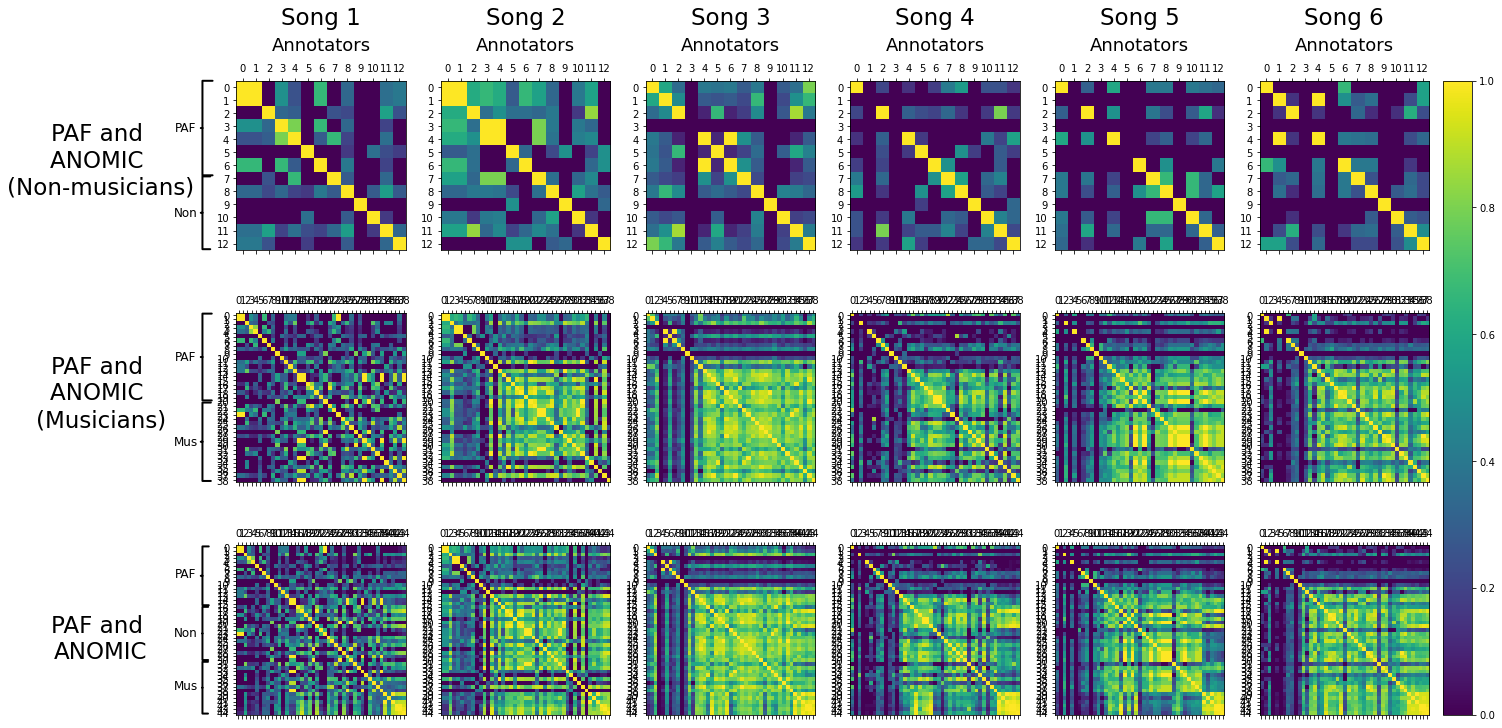

In [65]:
# VISUALISE MATRICES (ROWS)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import matplotlib.ticker as ticker

num_songs = 6
num_groups = 3
fig, ax = plt.subplots(num_groups, num_songs)
#plt.setp(ax.flat, xlabel='Annotators', ylabel='Annotators')


#cols = ['Precision','Recall', 'F1']
fig.set_figheight(12)
fig.set_figwidth(20)

pad = 5

for g in range(num_groups):
    
    #if ( g == 0):
    #    data = np.load('F1_only_PAF.npz')
    #    F1_matrix = data['F1']
        
    if ( g == 0):
        data = np.load('F1_only_PAF.npz')
        F1_matrix = data['F1']
        print((F1_matrix).shape[1])
        
    elif (g == 1):
        data = np.load('F1_t5_all_new.npz')
        F1_matrix = data['F1']
        
    elif (g == 2):
        data = np.load('F1_everything.npz')
        F1_matrix = data['F1']

    
    #elif (g==4):
    #    data = np.load('F1_everything.npz')
    #    F1_matrix = data['F1']
        
    for s in range(num_songs):

        #ax[g][s].set_xticklabels(['']+offset)
        #ax[g][s].set_yticklabels(['']+offset)
        a = ax[g][s].matshow(F1_matrix[s], vmin=0, vmax=1)
        #ax[g][0].annotate( "Annotators", xy=(-0.7, 0.325), xytext=(0, pad),
        #              xycoords='axes fraction', textcoords='offset points',
        #               size='18', ha='center', va='baseline')
        ax[g][s].xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax[g][s].yaxis.set_major_locator(ticker.MultipleLocator(1))
        


for i in range(num_songs):
        ax[0][i].annotate("Annotators", xy=(0.5, 1.15), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='18', ha='center', va='baseline')

        song_title = "Song " + str(i+1)
        ax[0][i].annotate( song_title, xy=(0.5, 1.3), xytext=(0, pad),
                        xycoords='axes fraction', textcoords='offset points',
                        size='23', ha='center', va='baseline')

    
# TODO
ax[0][0].annotate( "PAF and \nANOMIC \n(Non-musicians)", xy=(-0.8, 0.3), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='23', ha='center', va='baseline')
ax[1][0].annotate( "PAF and \nANOMIC \n(Musicians)", xy=(-0.8, 0.3), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='23', ha='center', va='baseline')
ax[2][0].annotate( "PAF and \nANOMIC", xy=(-0.8, 0.3), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='23', ha='center', va='baseline')



################
# bracket definitions for 1st row
ax[0][0].annotate('', xy=(-0.2, 0.72), xytext=(-0.21, 0.72), xycoords='axes fraction', 
            fontsize=6.75, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[0][0].annotate( "PAF", xy=(-0.3, 0.67), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')


ax[0][0].annotate('', xy=(-0.2, 0.22), xytext=(-0.21, 0.22), xycoords='axes fraction', 
            fontsize=5.2, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[0][0].annotate( "Non", xy=(-0.3, 0.17), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')

################
# bracket definitions for 2nd row
ax[1][0].annotate('', xy=(-0.2, 0.74), xytext=(-0.21, 0.74), xycoords='axes fraction', 
            fontsize=6.2, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[1][0].annotate( "PAF", xy=(-0.3, 0.69), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')


ax[1][0].annotate('', xy=(-0.2, 0.24), xytext=(-0.21, 0.24), xycoords='axes fraction', 
            fontsize=5.6, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[1][0].annotate( "Mus", xy=(-0.3, 0.19), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')

################
# define the bracket definitions for last row 
ax[2][0].annotate('', xy=(-0.2, 0.82), xytext=(-0.21, 0.82), xycoords='axes fraction', 
            fontsize=4.2, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[2][0].annotate( "PAF", xy=(-0.3, 0.78), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')

ax[2][0].annotate('', xy=(-0.2, 0.48), xytext=(-0.21, 0.48), xycoords='axes fraction', 
            fontsize=3.8, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[2][0].annotate( "Non", xy=(-0.3, 0.43), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')

ax[2][0].annotate('', xy=(-0.2, 0.16), xytext=(-0.21, 0.16), xycoords='axes fraction', 
            fontsize=3.7, ha='center', va='bottom', 
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
ax[2][0].annotate( "Mus", xy=(-0.3, 0.12), xytext=(0, pad),
        xycoords='axes fraction', textcoords='offset points',
        size='12', ha='center', va='baseline')

#fig.suptitle('F1 Scores', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=0.82)

# Colour bar
#fig.colorbar(a, ax=ax.ravel().tolist())
#fig.colorbar(a, ax=ax)
cax = fig.add_axes([ax[2][5].get_position().x1 + 0.01,ax[2][5].get_position().y0,0.02,ax[0][5].get_position().y1-ax[2][5].get_position().y0])
fig.colorbar(a, cax=cax)

plt.show()


#######################


45


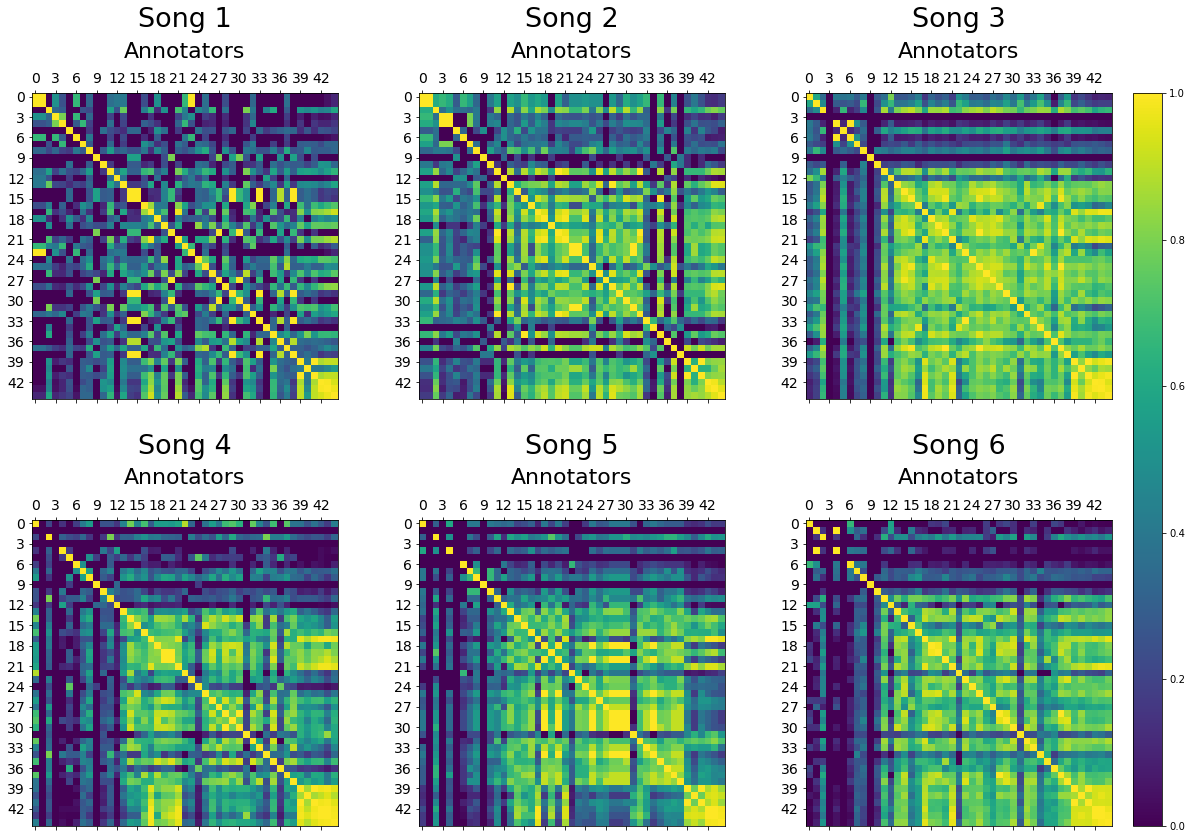

In [66]:
# VISUALISE MATRICES (ROWS)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import matplotlib.ticker as ticker

num_songs = 3
num_groups = 2
fig, ax = plt.subplots(num_groups, num_songs)
#plt.setp(ax.flat, xlabel='Annotators', ylabel='Annotators')


#cols = ['Precision','Recall', 'F1']
fig.set_figheight(12)
fig.set_figwidth(20)

pad = 5
label_size = 14

data = np.load('F1_everything.npz')
F1_matrix = data['F1']
print((F1_matrix).shape[1])



# Show matrices
for g in range(num_groups):
    for s in range(num_songs):
        #display the matrix
        the_plt = ax[g][s]
        a = the_plt.matshow(F1_matrix[s+g*3], vmin=0, vmax=1)    
        the_plt.xaxis.set_major_locator(ticker.MultipleLocator(3))
        the_plt.yaxis.set_major_locator(ticker.MultipleLocator(3))
        the_plt.tick_params(labelsize= label_size)
        
        # add figure titles
        the_plt.annotate("Annotators", xy=(0.5, 1.10), xytext=(0, pad),
                            xycoords='axes fraction', textcoords='offset points',
                            size='22', ha='center', va='baseline')

        song_title = "Song " + str(s+1+g*3)
        the_plt.annotate( song_title, xy=(0.5, 1.2), xytext=(0, pad),
                            xycoords='axes fraction', textcoords='offset points',
                            size='27', ha='center', va='baseline')

    
    ################
    # Bracket definitions for rows
    # BRACKETS: PAF(TC, ... ), ANOMIC (non, mus), Algorithms
    # 13 (...), 26 (.., ..), 5
    """
    hor_1 = -0.25
    # text, vert, bracket_size, word_size, text_hor, text_vert
    notes = [["PAF", 0.84, 6.75, 24, hor_1 ,0.8],
             ["ANOMIC", 0.4, 12, 24, hor_1, 0.26],
             ["ALG.", 0.06, 2.25, 24, hor_1, -0.02]
            ]
    
    for n in notes:
        this_plt = ax[g][0]
        text, vert, bracket_size, word_size, text_hor, text_vert  = n
        print(text, vert, bracket_size,text_hor, word_size )
        this_plt.annotate('', xy=(hor, vert), xytext=(hor-0.01, vert), xycoords='axes fraction', 
                    fontsize= bracket_size, ha='center', va='bottom', 
                    bbox=dict(boxstyle='square', fc='white'),
                    arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))
        this_plt.annotate( text, xy=(text_hor, text_vert), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=word_size, ha='center', va='baseline', rotation=90)
        this_plt.annotate(
                    '30.2',
                    xy=(3, 0),
                    xycoords='data',
                    xytext=(3, 0 - 5),
                    textcoords='data',
                    horizontalalignment='center',
                    arrowprops=dict(facecolor='black', arrowstyle="-")
                    )
    """
################
# Fix spacing
#fig.suptitle('F1 Scores', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=1.10)#0.82)
fig.tight_layout()
fig.subplots_adjust(wspace=-0.4)

################
# Colour bar
cax = fig.add_axes([ax[1][2].get_position().x1 + 0.015, 
                    ax[1][2].get_position().y0, 
                    0.02,
                    ax[0][2].get_position().y1-ax[1][2].get_position().y0])
fig.colorbar(a, cax=cax)
################
plt.show()


#######################


(6, 45, 45)
(6, 39, 39)


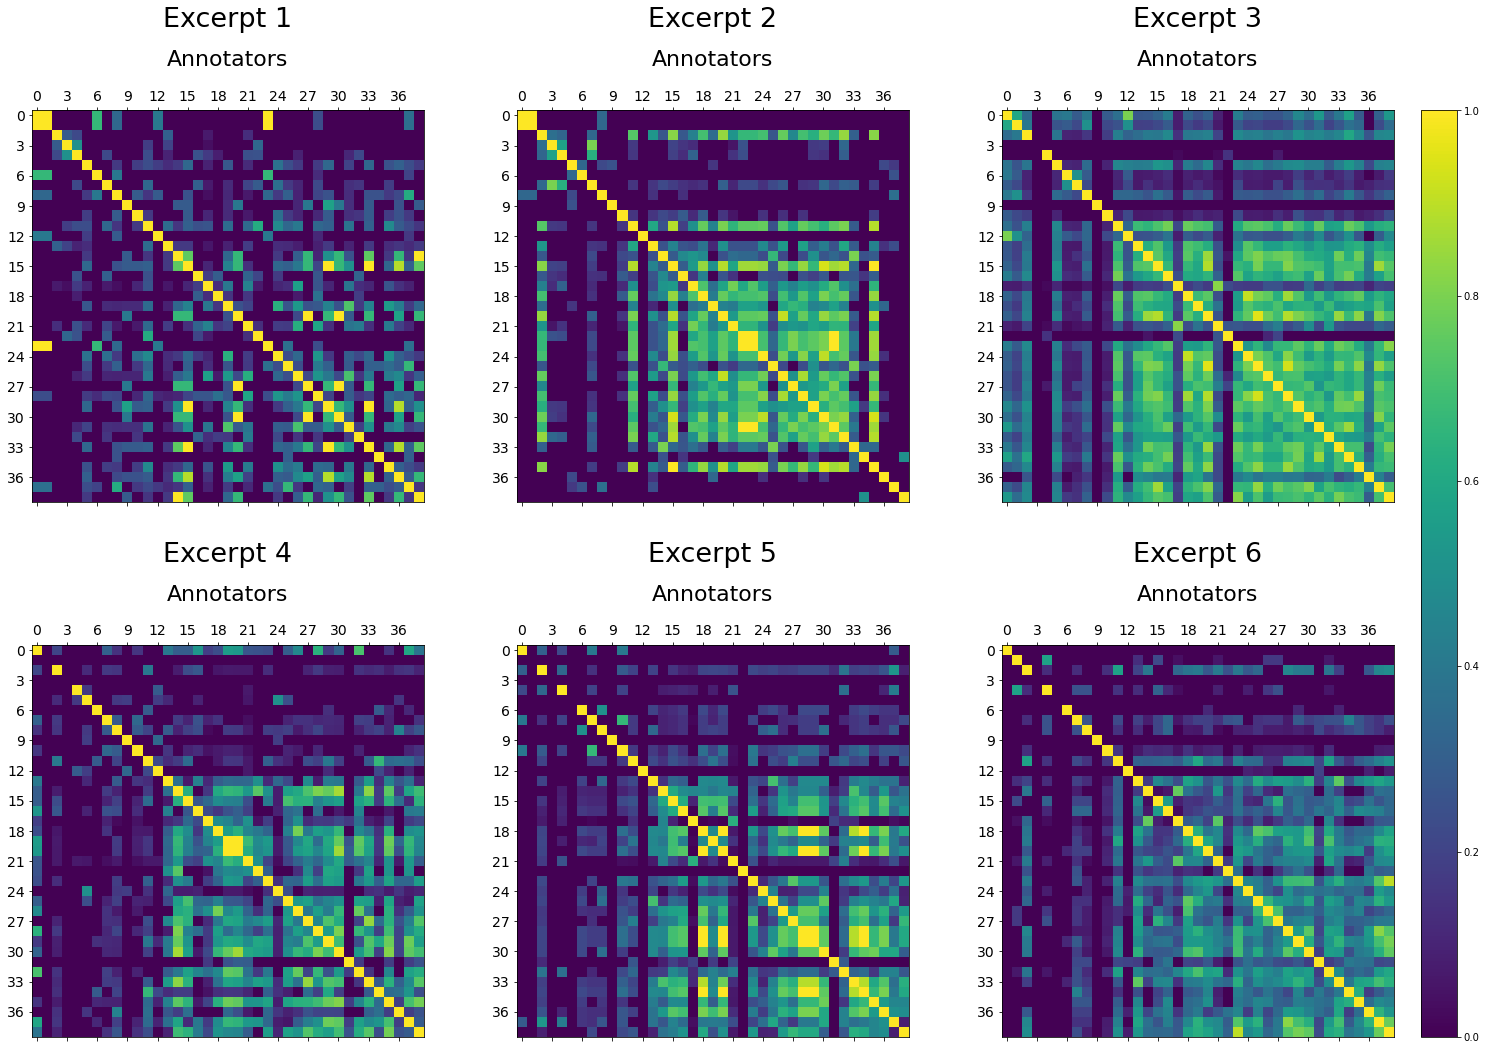

In [67]:
###############################################
# REVISED VERSION 
###############################################
# VISUALISE MATRICES (ROWS)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import matplotlib.ticker as ticker

num_songs = 3
num_groups = 2
fig, ax = plt.subplots(num_groups, num_songs)
#plt.setp(ax.flat, xlabel='Annotators', ylabel='Annotators')


#cols = ['Precision','Recall', 'F1']
fig.set_figheight(15)
fig.set_figwidth(25)

pad = 5
label_size = 14

data = np.load('F1_everything_t1.npz') #TODO was without t1
F1_matrix = data['F1']
print((F1_matrix).shape)

# TODO remove here (remove 6 -- algorithms)
F1_matrix = F1_matrix[:, :39, :39]
print((F1_matrix).shape)

# Show matrices
for g in range(num_groups):
    for s in range(num_songs):
        #display the matrix
        the_plt = ax[g][s]
        a = the_plt.matshow(F1_matrix[s+g*3], vmin=0, vmax=1)    
        the_plt.xaxis.set_major_locator(ticker.MultipleLocator(3))
        the_plt.yaxis.set_major_locator(ticker.MultipleLocator(3))
        the_plt.tick_params(labelsize= label_size)
        
        # add figure titles
        the_plt.annotate("Annotators", xy=(0.5, 1.10), xytext=(0, pad),
                            xycoords='axes fraction', textcoords='offset points',
                            size='22', ha='center', va='baseline')

        song_title = "Excerpt " + str(s+1+g*3)
        the_plt.annotate( song_title, xy=(0.5, 1.2), xytext=(0, pad),
                            xycoords='axes fraction', textcoords='offset points',
                            size='27', ha='center', va='baseline')


################
# Fix spacing
#fig.suptitle('F1 Scores', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=1.10)#0.82)
fig.tight_layout()
fig.subplots_adjust(wspace=-0.4)

################
# Colour bar
cax = fig.add_axes([ax[1][2].get_position().x1 + 0.015, 
                    ax[1][2].get_position().y0, 
                    0.02,
                    ax[0][2].get_position().y1-ax[1][2].get_position().y0])
fig.colorbar(a, cax=cax)
################
plt.show()


#######################



# Average agreement values #

In [69]:
data = np.load('F1_everything.npz') #TODO was without t1
F1_matrix = data['F1'] 

which_to_check = ['paf_means', 'an_means', 'alg_means', 'an_non', 'an_mus', 'paf_an', 'paf_alg', 'an_alg', 'paf_an_non', 'paf_an_mus',
                 'non_and_mus_new', 'paf_and_non_new', 'paf_and_mus_new']

all_mean_results = {i:0 for i in which_to_check}

F1_matrix = F1_matrix
for mat in F1_matrix: 
    # remove algorithms 
    mat = np.delete(mat, np.s_[39:], axis=0)   
    mat = np.delete(mat, np.s_[39:], axis=1)

    all_mean_results['paf_means'] += mat[0:13, 0:13].mean()
    all_mean_results['an_means'] += mat[13:(13+26), 13:(13+26)].mean()
    #alg_means += mat[-6:, -6:].mean()
    
    all_mean_results['an_non'] += mat[13:(13+12), 13:(13+12)].mean()
    all_mean_results['an_mus'] += mat[(13+12):, (13+12):].mean()

    all_mean_results['paf_an'] += mat[0:13, 13:(13+26)].mean()
    #paf_alg += mat[0:13, -6:].mean()
    #an_alg +=  mat[13:(13+26), -6:].mean()
    
    all_mean_results['paf_an_non'] += mat[:(13+12), :(13+12)].mean()
    
    # rows and cols 
    mat_1 = np.delete(mat, np.s_[13:25], axis=0)   
    mat_1 = np.delete(mat_1, np.s_[13:25], axis=1)

    all_mean_results['paf_an_mus'] += mat_1.mean()
    #print(mat.shape)
    #print(mat_1.shape)
    
    all_mean_results['non_and_mus_new'] += mat[25:, 13:25].mean()
    all_mean_results['paf_and_non_new'] += mat[13:, :13].mean()
    all_mean_results['paf_and_mus_new'] += mat_1[13:, :13].mean()
    

# divide by number of songs
all_mean_results = {k: v/len(F1_matrix) for (k,v) in all_mean_results.items()}

print("MEAN AGREEMENTS:\nPAF:", round(all_mean_results['paf_means'],2), "\nANOMIC:", round(all_mean_results['an_means'],2))
print("\nANOMIC Non-musicians", round(all_mean_results['an_non'],2))
print("ANOMIC Musicians", round(all_mean_results['an_mus'],2))
print("\nPAF / ANOMIC-NON", round(all_mean_results['paf_an_non'],2))
print("PAF / ANOMIC-MUS", round(all_mean_results['paf_an_mus'],2 ))
print("\nPAF / ANOMIC:", round(all_mean_results['paf_an'], 2))
print("\nNEW:")
print("NON and MUS new:", round(all_mean_results['non_and_mus_new'], 2))
print("paf and non NEW:", round(all_mean_results['paf_and_non_new'],2), "\npaf and mus NEW:", round(all_mean_results['paf_and_mus_new'],2))

MEAN AGREEMENTS:
PAF: 0.25 
ANOMIC: 0.6

ANOMIC Non-musicians 0.63
ANOMIC Musicians 0.61

PAF / ANOMIC-NON 0.34
PAF / ANOMIC-MUS 0.34

PAF / ANOMIC: 0.25

NEW:
NON and MUS new: 0.59
paf and non NEW: 0.25 
paf and mus NEW: 0.25
